In [3]:
!pip install pymc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.1
    Uninstalling numpy-1.22.1:
      Successfully uninstalled numpy-1.22.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: arviz
    Found existing installation: arviz 0.12.1
    Uninstalling arviz-0.12.1:
      Successfully uninstalled arviz-0.12.1
ERROR: pip's dependency resolver does not currently take into account all t

/usr/local/lib/python3.10/dist-packages/pytensor/scalar/math.py:12: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.1)
  import scipy.special
RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79a8611a0670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_control

Output()

Output()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79a85f56b010>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so: cannot open shared object file: No such file or directory
Exception ignored on calling ctypes callback function: <function Threadpool

Output()

Output()

Baseline PD and LGD Summary:
      mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
pd   0.027  0.015     0.003      0.057      0.000    0.000    5918.0   
lgd  0.603  0.147     0.313      0.871      0.002    0.001    5374.0   

     ess_tail  r_hat  
pd     4251.0    1.0  
lgd    5048.0    1.0  

Stressed PD and LGD Summary:
             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
pd_stress   0.055  0.022     0.016      0.097      0.000    0.000    5090.0   
lgd_stress  0.749  0.132     0.488      0.969      0.002    0.001    6217.0   

            ess_tail  r_hat  
pd_stress     4664.0    1.0  
lgd_stress    4840.0    1.0  


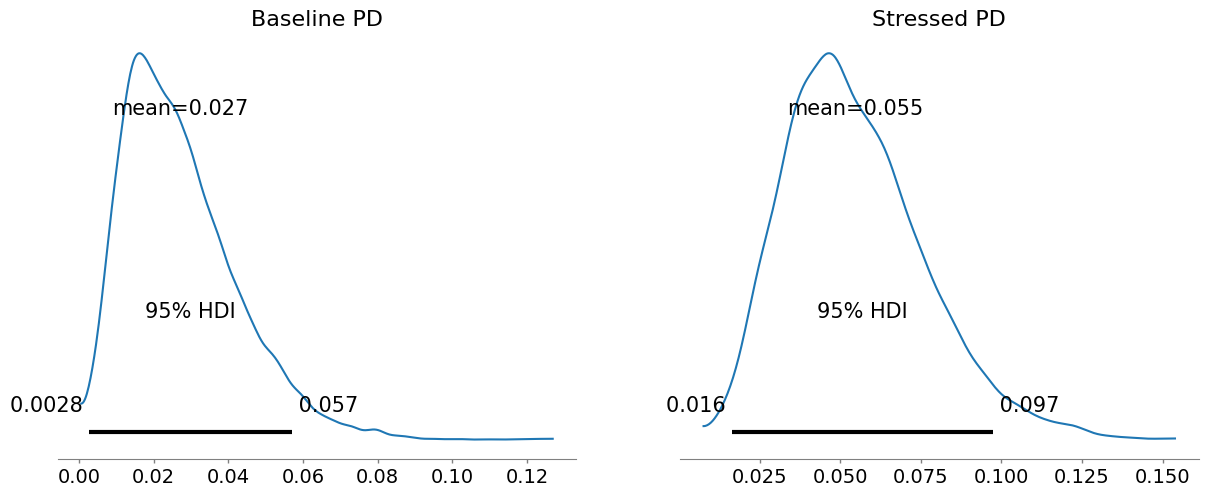

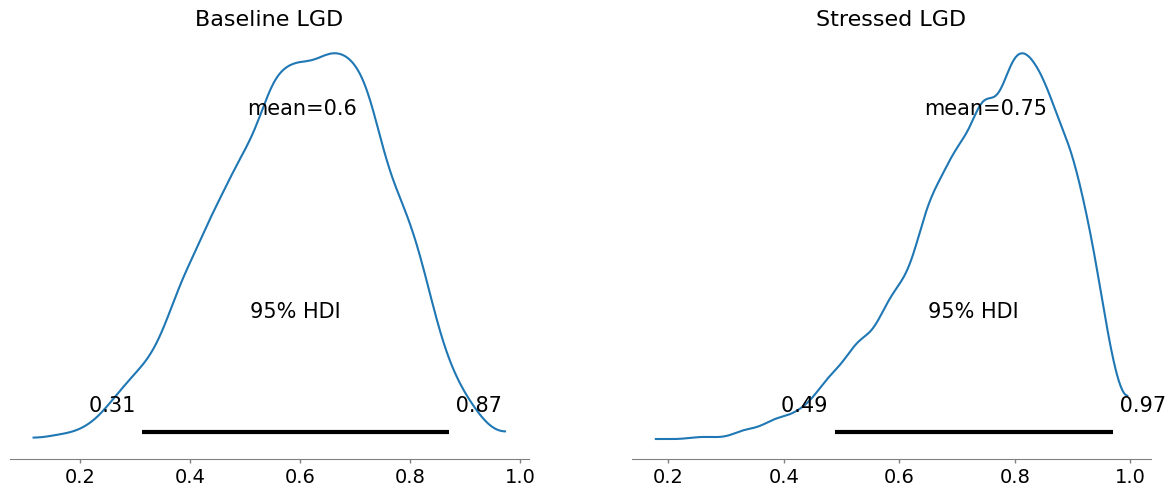

Baseline Expected Loss per Loan: $16,436.01
Stressed Expected Loss per Loan: $40,790.94


In [4]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Data
n_loans = 10
n_defaults = 1

# Baseline Model with LGD
with pm.Model() as model:
    # Prior for PD
    alpha_prior_pd = 2
    beta_prior_pd = 98
    pd = pm.Beta('pd', alpha=alpha_prior_pd, beta=beta_prior_pd)

    # Prior for LGD
    alpha_prior_lgd = 6   # Mean LGD = 0.6
    beta_prior_lgd = 4
    lgd = pm.Beta('lgd', alpha=alpha_prior_lgd, beta=beta_prior_lgd)

    # Likelihood for defaults
    defaults_observed = pm.Binomial('defaults_observed', n=n_loans, p=pd, observed=n_defaults)

    # Sampling
    trace = pm.sample(5000, tune=1000, target_accept=0.95, random_seed=42, return_inferencedata=True)

# Stressed Model with LGD
with pm.Model() as stressed_model:
    # Prior for PD under stress
    alpha_stress_pd = 5
    beta_stress_pd = 95
    pd_stress = pm.Beta('pd_stress', alpha=alpha_stress_pd, beta=beta_stress_pd)

    # Prior for LGD under stress
    alpha_stress_lgd = 7.5   # Mean LGD = 0.75
    beta_stress_lgd = 2.5
    lgd_stress = pm.Beta('lgd_stress', alpha=alpha_stress_lgd, beta=beta_stress_lgd)

    # Likelihood for defaults
    defaults_observed_stress = pm.Binomial('defaults_observed_stress', n=n_loans, p=pd_stress, observed=n_defaults)

    # Sampling
    stressed_trace = pm.sample(5000, tune=1000, target_accept=0.95, random_seed=42, return_inferencedata=True)

# Posterior Summaries
print("Baseline PD and LGD Summary:")
print(az.summary(trace, var_names=['pd', 'lgd'], hdi_prob=0.95))

print("\nStressed PD and LGD Summary:")
print(az.summary(stressed_trace, var_names=['pd_stress', 'lgd_stress'], hdi_prob=0.95))

# Plot PD
az.plot_posterior({'Baseline PD': trace.posterior['pd'], 'Stressed PD': stressed_trace.posterior['pd_stress']}, hdi_prob=0.95)
plt.show()

# Plot LGD
az.plot_posterior({'Baseline LGD': trace.posterior['lgd'], 'Stressed LGD': stressed_trace.posterior['lgd_stress']}, hdi_prob=0.95)
plt.show()

# Expected Loss Calculation
ead = 1_000_000

# Baseline Expected Loss
pd_samples = trace.posterior['pd'].values.flatten()
lgd_samples = trace.posterior['lgd'].values.flatten()

expected_loss_per_loan = ead * pd_samples * lgd_samples
print(f"Baseline Expected Loss per Loan: ${np.mean(expected_loss_per_loan):,.2f}")

# Stressed Expected Loss
pd_stress_samples = stressed_trace.posterior['pd_stress'].values.flatten()
lgd_stress_samples = stressed_trace.posterior['lgd_stress'].values.flatten()

expected_loss_per_loan_stress = ead * pd_stress_samples * lgd_stress_samples
print(f"Stressed Expected Loss per Loan: ${np.mean(expected_loss_per_loan_stress):,.2f}")
